In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Construct parameter grid

In [2]:
N_vec = np.array([1e4,1e5,1e6,1e7])
Nmu_vec = np.array([1e-2,1e-1,1,1e1,1e2])
demu_vec = np.array([1,10,100,1000,10000])
saneu_vec = np.array([1.02])
saneu_vec2 = np.array([1.05])
smutaneu_vec = np.array([1/4])
squot_vec = np.array([1.001,1.005,1.01,1.05])

In [3]:
para_space=np.array([np.array([N, δ, μ, w_aneu, w_mut_aneu, w_mut]) for N in N_vec for δ in Nmu_vec/N for μ in demu_vec*δ for w_aneu in saneu_vec for w_mut in squot_vec*w_aneu for w_mut_aneu in w_mut*smutaneu_vec+w_aneu*(1-smutaneu_vec)] )
para_space

array([[1.000000e+04, 1.000000e-06, 1.000000e-06, 1.020000e+00,
        1.020255e+00, 1.021020e+00],
       [1.000000e+04, 1.000000e-06, 1.000000e-06, 1.020000e+00,
        1.021275e+00, 1.025100e+00],
       [1.000000e+04, 1.000000e-06, 1.000000e-06, 1.020000e+00,
        1.022550e+00, 1.030200e+00],
       ...,
       [1.000000e+07, 1.000000e-05, 1.000000e-01, 1.020000e+00,
        1.021275e+00, 1.025100e+00],
       [1.000000e+07, 1.000000e-05, 1.000000e-01, 1.020000e+00,
        1.022550e+00, 1.030200e+00],
       [1.000000e+07, 1.000000e-05, 1.000000e-01, 1.020000e+00,
        1.032750e+00, 1.071000e+00]])

In [4]:
len(para_space)

400

In [73]:
para_space2=np.array([np.array([N, δ, μ, w_aneu, w_mut_aneu, w_mut]) for N in N_vec for δ in Nmu_vec/N for μ in demu_vec*δ for w_aneu in saneu_vec2 for w_mut in squot_vec*w_aneu for w_mut_aneu in w_mut*smutaneu_vec+w_aneu*(1-smutaneu_vec)] )
para_space2

array([[1.0000000e+04, 1.0000000e-06, 1.0000000e-06, 1.0500000e+00,
        1.0502625e+00, 1.0510500e+00],
       [1.0000000e+04, 1.0000000e-06, 1.0000000e-06, 1.0500000e+00,
        1.0513125e+00, 1.0552500e+00],
       [1.0000000e+04, 1.0000000e-06, 1.0000000e-06, 1.0500000e+00,
        1.0526250e+00, 1.0605000e+00],
       ...,
       [1.0000000e+07, 1.0000000e-05, 1.0000000e-01, 1.0500000e+00,
        1.0513125e+00, 1.0552500e+00],
       [1.0000000e+07, 1.0000000e-05, 1.0000000e-01, 1.0500000e+00,
        1.0526250e+00, 1.0605000e+00],
       [1.0000000e+07, 1.0000000e-05, 1.0000000e-01, 1.0500000e+00,
        1.0631250e+00, 1.1025000e+00]])

In [74]:
len(para_space2)

400

In [77]:
para_space[1]

array([1.000000e+04, 1.000000e-06, 1.000000e-06, 1.020000e+00,
       1.021275e+00, 1.025100e+00])

In [75]:
np.save('para_space.npy', para_space, allow_pickle=True) 

In [76]:
np.save('para_space2.npy', para_space2, allow_pickle=True)

# Create data frame

In [20]:
grid_sims=np.load('grid_sims_ext.npz' ,allow_pickle=True)['a'] # grid_sims comes from para_space 
grid2_sims=np.load('grid2_sims_ext.npz' ,allow_pickle=True)['a'] # grid2_sims from para_space2

In [3]:
grid_sims[0,3][0:2,4]

array([1.    , 0.9992])

In [21]:
data=np.array([np.append(grid_sims[x,0],grid_sims[x,3][0:2,y]) for x in range(len(grid_sims)) for y in range(100)])
data2=np.array([np.append(grid2_sims[x,0],grid2_sims[x,3][0:2,y]) for x in range(len(grid2_sims)) for y in range(100)])

In [5]:
data

array([[1.000000e+04, 1.000000e-06, 1.000000e-06, ..., 1.021020e+00,
        1.000000e-04, 0.000000e+00],
       [1.000000e+04, 1.000000e-06, 1.000000e-06, ..., 1.021020e+00,
        1.160000e-02, 0.000000e+00],
       [1.000000e+04, 1.000000e-06, 1.000000e-06, ..., 1.021020e+00,
        5.000000e-04, 0.000000e+00],
       ...,
       [1.000000e+07, 1.000000e-05, 1.000000e-01, ..., 1.071000e+00,
        9.966442e-01, 6.152374e-01],
       [1.000000e+07, 1.000000e-05, 1.000000e-01, ..., 1.071000e+00,
        9.963469e-01, 6.283697e-01],
       [1.000000e+07, 1.000000e-05, 1.000000e-01, ..., 1.071000e+00,
        9.962361e-01, 5.727416e-01]])

In [22]:
df=pd.DataFrame(data, columns=['N', 'μ', 'δ', 'w1', 'w2', 'w3', 'max_2n+1', 'F_A'])
df2=pd.DataFrame(data2, columns=['N', 'μ', 'δ', 'w1', 'w2', 'w3', 'max_2n+1', 'F_A'])
df

,N,μ,δ,w1,w2,w3,max_2n+1,F_A
0,10000.0,0.000001,0.000001,1.02,1.020255,1.02102,0.000100,0.000000
1,10000.0,0.000001,0.000001,1.02,1.020255,1.02102,0.011600,0.000000
2,10000.0,0.000001,0.000001,1.02,1.020255,1.02102,0.000500,0.000000
3,10000.0,0.000001,0.000001,1.02,1.020255,1.02102,1.000000,0.999100
4,10000.0,0.000001,0.000001,1.02,1.020255,1.02102,1.000000,0.999200
...,...,...,...,...,...,...,...,...
35995,10000000.0,0.000010,0.100000,1.02,1.032750,1.07100,0.996295,0.512751
35996,10000000.0,0.000010,0.100000,1.02,1.032750,1.07100,0.996440,0.572604
35997,10000000.0,0.000010,0.100000,1.02,1.032750,1.07100,0.996644,0.615237
35998,10000000.0,0.000010,0.100000,1.02,1.032750,1.07100,0.996347,0.628370


In [23]:
gridsims_meanfa=np.array([np.mean(grid_sims[x,3][1]) for x in range(len(grid_sims))])
grid2sims_meanfa=np.array([np.mean(grid2_sims[x,3][1]) for x in range(len(grid2_sims))])
gridsims_mean_max2n1=np.array([np.mean(grid_sims[x,3][0]) for x in range(len(grid_sims))])
grid2sims_mean_max2n1=np.array([np.mean(grid2_sims[x,3][0]) for x in range(len(grid2_sims))])

In [24]:
df['meanmax_2n+1']=np.repeat(gridsims_mean_max2n1,100)
df['meanF_A']=np.repeat(gridsims_meanfa,100)
df

,N,μ,δ,w1,w2,w3,max_2n+1,F_A,meanmax_2n+1,meanF_A
0,10000.0,0.000001,0.000001,1.02,1.020255,1.02102,0.000100,0.000000,0.467494,0.439622
1,10000.0,0.000001,0.000001,1.02,1.020255,1.02102,0.011600,0.000000,0.467494,0.439622
2,10000.0,0.000001,0.000001,1.02,1.020255,1.02102,0.000500,0.000000,0.467494,0.439622
3,10000.0,0.000001,0.000001,1.02,1.020255,1.02102,1.000000,0.999100,0.467494,0.439622
4,10000.0,0.000001,0.000001,1.02,1.020255,1.02102,1.000000,0.999200,0.467494,0.439622
...,...,...,...,...,...,...,...,...,...,...
35995,10000000.0,0.000010,0.100000,1.02,1.032750,1.07100,0.996295,0.512751,0.996436,0.594228
35996,10000000.0,0.000010,0.100000,1.02,1.032750,1.07100,0.996440,0.572604,0.996436,0.594228
35997,10000000.0,0.000010,0.100000,1.02,1.032750,1.07100,0.996644,0.615237,0.996436,0.594228
35998,10000000.0,0.000010,0.100000,1.02,1.032750,1.07100,0.996347,0.628370,0.996436,0.594228


# Analyze simulation results

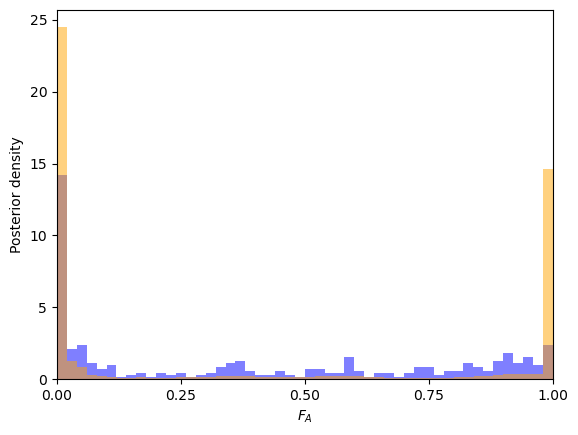

In [37]:
plt.hist(df['meanF_A'], 50, density=True, color='blue', alpha=.5)
plt.hist(df['F_A'], 50, density=True, color='orange', alpha=.5)
plt.xlabel('$F_A$')
plt.ylabel('Posterior density')
plt.xlim([0,1])
plt.xticks([0, 0.25, 0.5, 0.75, 1]);

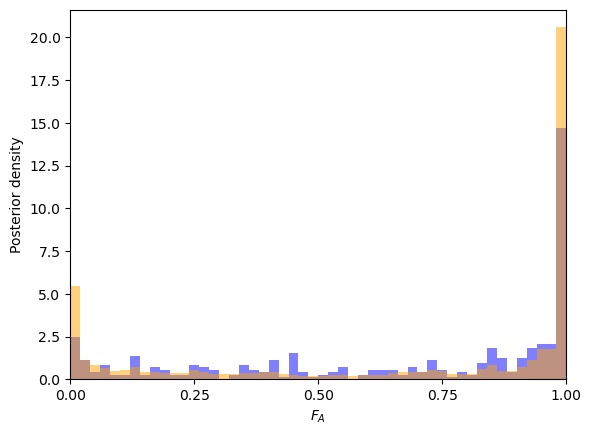

In [38]:
plt.hist(df['meanmax_2n+1'], 50, density=True, color='blue', alpha=.5)
plt.hist(df['max_2n+1'], 50, density=True, color='orange', alpha=.5)
plt.xlabel('$F_A$')
plt.ylabel('Posterior density')
plt.xlim([0,1])
plt.xticks([0, 0.25, 0.5, 0.75, 1]);

In [74]:
aneu_unimp = (df['F_A']<.5) & (df['max_2n+1']<.5)
aneu_stepstone = (df['F_A']>.5) & (df['max_2n+1']>.5)
aneu_detour = (df['F_A']<.5) & (df['max_2n+1']>.5)
rest = (df['F_A']>.5) & (df['max_2n+1']<.5)

In [75]:
sum(aneu_unimp), sum(aneu_stepstone), sum(aneu_detour), sum(rest), sum(aneu_unimp) + sum(aneu_stepstone) + sum(aneu_detour)

(11654, 14047, 10249, 50, 35950)

In [76]:
aneu_unimp_m = (df['meanF_A']<.5) & (df['meanmax_2n+1']<.5)
aneu_stepstone_m = (df['meanF_A']>.5) & (df['meanmax_2n+1']>.5)
aneu_detour_m = (df['meanF_A']<.5) & (df['meanmax_2n+1']>.5)
rest_m = (df['meanF_A']>.5) & (df['meanmax_2n+1']<.5)

In [77]:
sum(aneu_unimp_m), sum(aneu_stepstone_m), sum(aneu_detour_m), sum(rest_m)

(11800, 14700, 9500, 0)

Text(0, 0.5, 'Aneuploidy rate, $\\delta$')

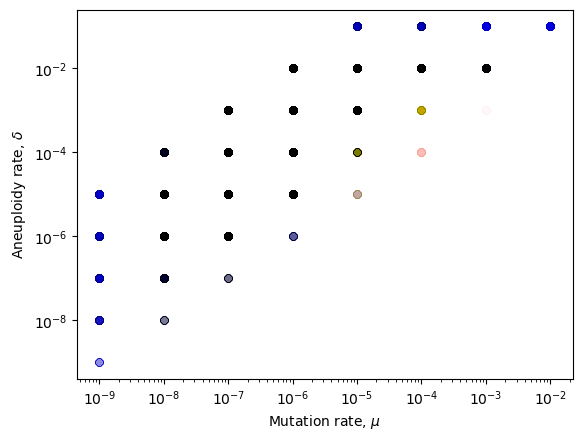

In [102]:
plt.plot(df[aneu_stepstone]['μ'], df[aneu_stepstone]['δ'], 'o', color='blue', alpha=.003 )
plt.plot(df[aneu_detour]['μ'], df[aneu_detour]['δ'], 'o', color='orange', alpha=.003)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mutation rate, $\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')

Text(0, 0.5, 'Aneuploidy rate, $\\delta$')

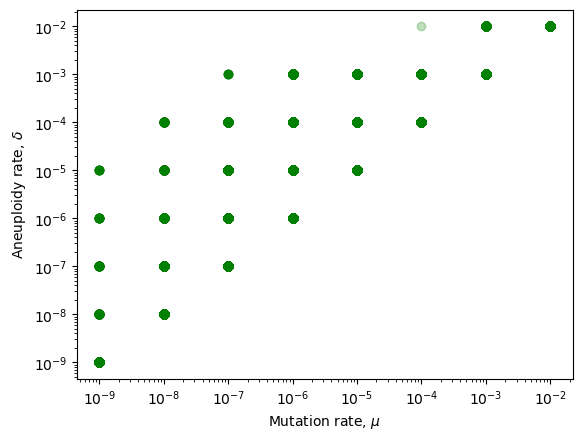

In [105]:
plt.plot(df[aneu_unimp]['μ'], df[aneu_unimp]['δ'], 'o', color='green', alpha=.25)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mutation rate, $\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')

Text(0, 0.5, '$w_{2n*}/w_{2n+1}-1$')

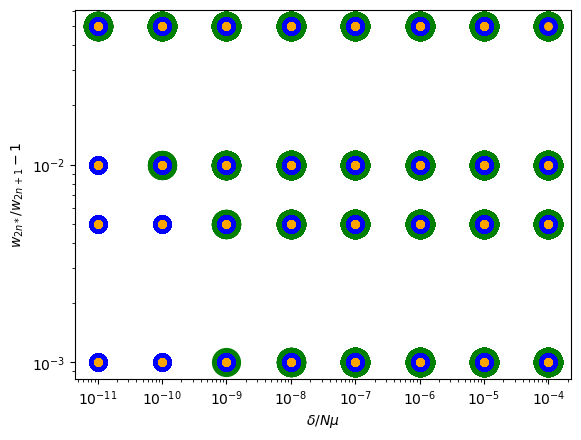

In [152]:
plt.plot(df[aneu_unimp]['μ']/(df[aneu_unimp]['δ']*df[aneu_unimp]['N']), df[aneu_unimp]['w3']/df[aneu_unimp]['w1']-1, 'o', color='green', alpha=1, markersize=20)
plt.plot(df[aneu_stepstone]['μ']/(df[aneu_stepstone]['δ']*df[aneu_stepstone]['N']), df[aneu_stepstone]['w3']/df[aneu_stepstone]['w1']-1, 'o', color='blue', alpha=1, markersize=12)
plt.plot(df[aneu_detour]['μ']/(df[aneu_detour]['δ']*df[aneu_detour]['N']), df[aneu_detour]['w3']/df[aneu_detour]['w1']-1, 'o', color='orange', alpha=1, markersize=5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/N\mu$')
plt.ylabel('$w_{2n*}/w_{2n+1}-1$')

Text(0, 0.5, '$w_{2n*}/w_{2n+1}-1$')

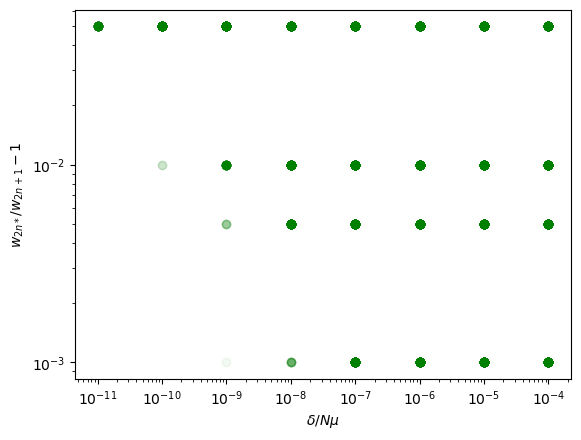

In [154]:
plt.plot(df[aneu_unimp]['μ']/(df[aneu_unimp]['δ']*df[aneu_unimp]['N']), df[aneu_unimp]['w3']/df[aneu_unimp]['w1']-1, 'o', color='green', alpha=.05)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/N\mu$')
plt.ylabel('$w_{2n*}/w_{2n+1}-1$')

Text(0, 0.5, '$w_{2n*}/w_{2n+1}-1$')

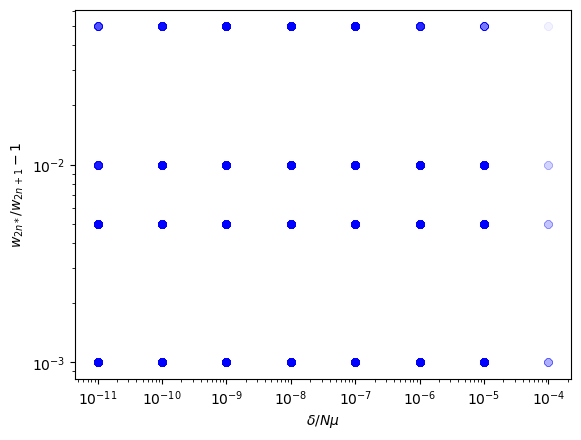

In [125]:
plt.plot(df[aneu_stepstone]['μ']/(df[aneu_stepstone]['δ']*df[aneu_stepstone]['N']), df[aneu_stepstone]['w3']/df[aneu_stepstone]['w1']-1, 'o', color='blue', alpha=.005)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/N\mu$')
plt.ylabel('$w_{2n*}/w_{2n+1}-1$')

Text(0, 0.5, '$w_{2n*}/w_{2n+1}-1$')

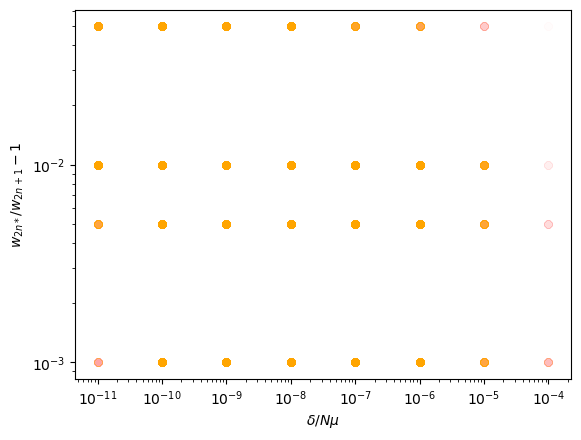

In [124]:
plt.plot(df[aneu_detour]['μ']/(df[aneu_detour]['δ']*df[aneu_detour]['N']), df[aneu_detour]['w3']/df[aneu_detour]['w1']-1, 'o', color='orange', alpha=.005)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/N\mu$')
plt.ylabel('$w_{2n*}/w_{2n+1}-1$')

Text(0, 0.5, '$w_{2n*}/w_{2n+1}-1$')

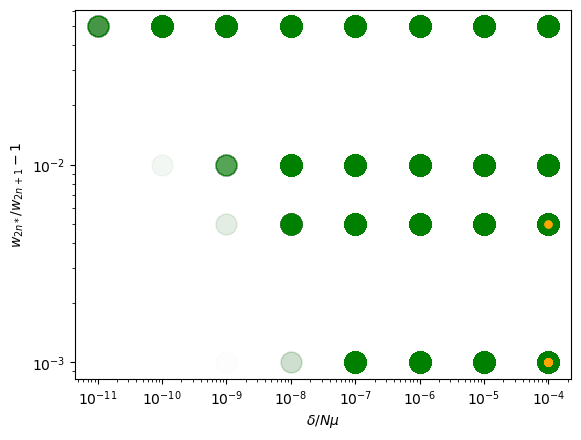

In [148]:
plt.plot(df[aneu_unimp]['μ']/(df[aneu_unimp]['δ']*df[aneu_unimp]['N']), df[aneu_unimp]['w3']/df[aneu_unimp]['w1']-1, 'o', color='green', alpha=.01, markersize=15)
plt.plot(df[rest]['μ']/(df[rest]['δ']*df[rest]['N']), df[rest]['w3']/df[rest]['w1']-1, 'o', color='orange', alpha=1, markersize=5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/N\mu$')
plt.ylabel('$w_{2n*}/w_{2n+1}-1$')